In [105]:
import pandas as pd
df = pd.read_csv('combined.csv')


In [106]:
df.replace('?', np.nan, inplace=True)
df

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,target
0,29.0,F,f,f,f,f,f,f,f,t,...,f,f,f,f,0.3,NaN,NaN,NaN,NaN,negative
1,29.0,F,f,f,f,f,f,f,f,f,...,f,f,f,f,1.6,1.9,128.0,NaN,NaN,negative
2,41.0,F,f,f,f,f,f,f,f,f,...,f,f,f,f,NaN,NaN,NaN,NaN,NaN,negative
3,36.0,F,f,f,f,f,f,f,f,f,...,f,f,f,f,NaN,NaN,NaN,NaN,NaN,negative
4,60.0,F,f,f,f,f,f,f,f,f,...,f,f,f,f,NaN,NaN,NaN,NaN,NaN,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10716,30,F,f,f,f,f,f,f,f,f,...,f,t,f,f,NaN,NaN,NaN,NaN,NaN,negative
10717,68,F,f,f,f,f,f,f,f,f,...,f,f,f,f,1,2.1,124,1.08,114,negative
10718,74,F,f,f,f,f,f,f,f,f,...,f,f,f,f,5.1,1.8,112,1.07,105,negative
10719,72,M,f,f,f,f,f,f,f,f,...,f,f,f,f,0.7,2,82,0.94,87,negative


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10721 entries, 0 to 10720
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  10720 non-null  object
 1   sex                  10345 non-null  object
 2   on_thyroxine         10721 non-null  object
 3   query_on_thyroxine   10721 non-null  object
 4   on_antithyroid_meds  10721 non-null  object
 5   sick                 10721 non-null  object
 6   pregnant             10721 non-null  object
 7   thyroid_surgery      10721 non-null  object
 8   I131_treatment       10721 non-null  object
 9   query_hypothyroid    10721 non-null  object
 10  query_hyperthyroid   10721 non-null  object
 11  lithium              10721 non-null  object
 12  goitre               10721 non-null  object
 13  tumor                10721 non-null  object
 14  hypopituitary        10721 non-null  object
 15  psych                10721 non-null  object
 16  TSH 

In [108]:
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df['TSH'] = pd.to_numeric(df['TSH'], errors='coerce')
df['T3'] = pd.to_numeric(df['T3'], errors='coerce')
df['TT4'] = pd.to_numeric(df['TT4'], errors='coerce')
df['T4U'] = pd.to_numeric(df['T4U'], errors='coerce')
df['FTI'] = pd.to_numeric(df['FTI'], errors='coerce')

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10721 entries, 0 to 10720
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  10720 non-null  float64
 1   sex                  10345 non-null  object 
 2   on_thyroxine         10721 non-null  object 
 3   query_on_thyroxine   10721 non-null  object 
 4   on_antithyroid_meds  10721 non-null  object 
 5   sick                 10721 non-null  object 
 6   pregnant             10721 non-null  object 
 7   thyroid_surgery      10721 non-null  object 
 8   I131_treatment       10721 non-null  object 
 9   query_hypothyroid    10721 non-null  object 
 10  query_hyperthyroid   10721 non-null  object 
 11  lithium              10721 non-null  object 
 12  goitre               10721 non-null  object 
 13  tumor                10721 non-null  object 
 14  hypopituitary        10721 non-null  object 
 15  psych                10721 non-null 

In [110]:
df[df.age > 100]

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,target
8313,455.0,F,f,f,f,f,f,f,f,f,...,f,f,f,f,1.1,2.0,118.0,1.13,104.0,negative


In [111]:
df['age'] = np.where((df.age > 100), np.nan, df.age)

In [112]:
# dropping 4 observations with abnormal 'age' from dataset
df.dropna(subset=['age'], inplace=True)

# changing sex of observations with ('pregnant' == True) & ('sex' == null) to Female
df['sex'] = np.where((df.sex.isnull()) & (df.pregnant == 't'), 'F', df.sex)

In [113]:
# df.drop('n_missing',axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10719 entries, 0 to 10720
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  10719 non-null  float64
 1   sex                  10345 non-null  object 
 2   on_thyroxine         10719 non-null  object 
 3   query_on_thyroxine   10719 non-null  object 
 4   on_antithyroid_meds  10719 non-null  object 
 5   sick                 10719 non-null  object 
 6   pregnant             10719 non-null  object 
 7   thyroid_surgery      10719 non-null  object 
 8   I131_treatment       10719 non-null  object 
 9   query_hypothyroid    10719 non-null  object 
 10  query_hyperthyroid   10719 non-null  object 
 11  lithium              10719 non-null  object 
 12  goitre               10719 non-null  object 
 13  tumor                10719 non-null  object 
 14  hypopituitary        10719 non-null  object 
 15  psych                10719 non-null  obje

In [114]:
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import balanced_accuracy_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.utils.class_weight import compute_sample_weight

# replacing boolean strings with binary 0 and 1
df.replace('f', 0, inplace=True)
df.replace('t', 1, inplace=True)

# replacing sex with binary 0 and 1
df.replace('M', 0, inplace=True) # male mapped to 0
df.replace('F', 1, inplace=True) # female mapped to 1

xgbDF = df.replace(np.nan, 0)

# re-mapping target vaues to diagnostic groups
# *** I get different final results by ordering these classes differently ***
diagnoses = {'negative': 0,
             'hyperthyroid': 1,
             'compensated_hypothyroid': 2,
             'primary_hypothyroid': 3,
             'secondary_hypothyroid': 4
            }

xgbDF['target'] = xgbDF['target'].map(diagnoses) # re-mapping

# train and test split --> stratified
X = xgbDF.drop('target', axis=1).copy()
y = xgbDF['target'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

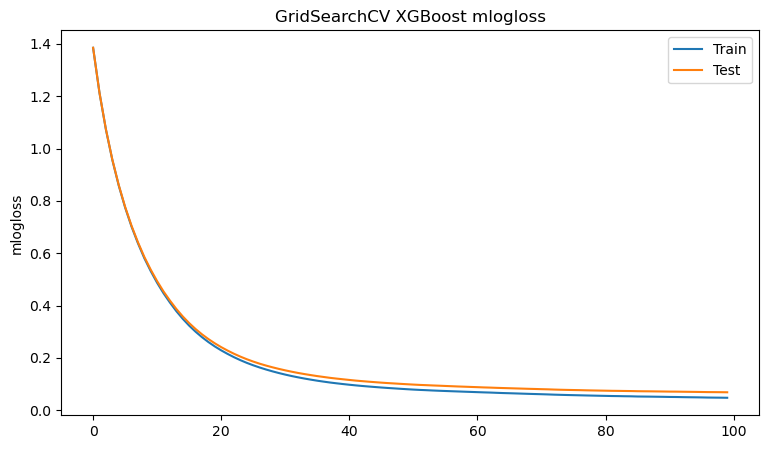

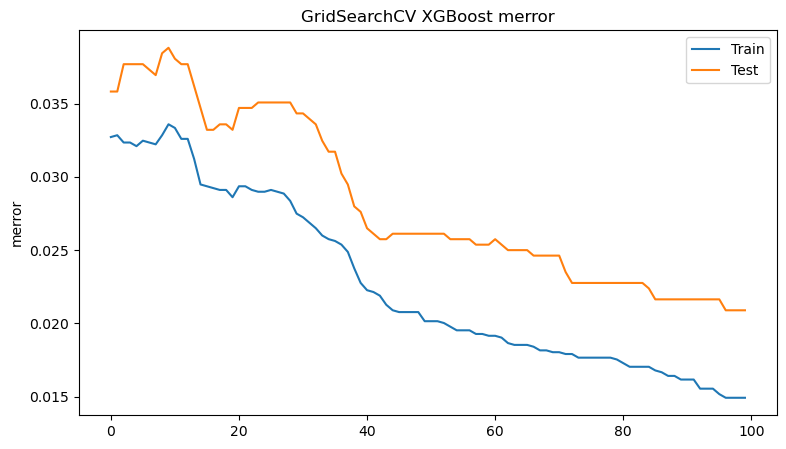


------------------ Confusion Matrix -----------------

[[2509   43    8    1    1]
 [   2   43    0    0    0]
 [   0    0   49    0    0]
 [   1    0    0   23    0]
 [   0    0    0    0    0]]

Accuracy: 0.98
Balanced Accuracy: 0.97

Micro Precision: 0.98
Micro Recall: 0.98
Micro F1-score: 0.98

Macro Precision: 0.66
Macro Recall: 0.78
Macro F1-score: 0.71

Weighted Precision: 0.99
Weighted Recall: 0.98
Weighted F1-score: 0.98

--------------- Classification Report ---------------

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2562
           1       0.50      0.96      0.66        45
           2       0.86      1.00      0.92        49
           3       0.96      0.96      0.96        24
           4       0.00      0.00      0.00         0

    accuracy                           0.98      2680
   macro avg       0.66      0.78      0.71      2680
weighted avg       0.99      0.98      0.98      2680

--------------------

/Users/dinesh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2399: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/Users/dinesh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/dinesh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/dinesh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with n

In [119]:
## ---------- XGBoost model v3 ----------
## third run of model with "optimized" hyperparameters and
## attempting to treat unbalanced target classes

# balancing 'target' class weights
sample_weights = compute_sample_weight(
    class_weight='balanced',
    y=y_train)

# declaring and fitting xgb classifier
xgb_clf = xgb.XGBClassifier(objective='multi:softmax', 
                            num_class=3, 
                            missing=1,
                            gamma=0, # default gamma value
                            learning_rate=0.1,
                            max_depth=5, # re-optimized from v2
                            reg_lambda=1, # default L2 value
                            #subsample=0.8, # tried but not ideal
                            #colsample_bytree=0.3, # tried but not ideal
                            early_stopping_rounds=10,
                            eval_metric=['merror','mlogloss'],
                            seed=42)
xgb_clf.fit(X_train, 
            y_train,
            verbose=0, # set to 1 to see xgb training round intermediate results
            sample_weight=sample_weights, # class weights to combat unbalanced 'target'
            eval_set=[(X_train, y_train), (X_test, y_test)])

# preparing evaluation metric plots
results = xgb_clf.evals_result()
epochs = len(results['validation_0']['mlogloss'])
x_axis = range(0, epochs)

# xgboost 'mlogloss' plot
fig, ax = plt.subplots(figsize=(9,5))
ax.plot(x_axis, results['validation_0']['mlogloss'], label='Train')
ax.plot(x_axis, results['validation_1']['mlogloss'], label='Test')
ax.legend()
plt.ylabel('mlogloss')
plt.title('GridSearchCV XGBoost mlogloss')
plt.show()

# xgboost 'merror' plot
fig, ax = plt.subplots(figsize=(9,5))
ax.plot(x_axis, results['validation_0']['merror'], label='Train')
ax.plot(x_axis, results['validation_1']['merror'], label='Test')
ax.legend()
plt.ylabel('merror')
plt.title('GridSearchCV XGBoost merror')
plt.show()

## ---------- Model Classification Report ----------
## get predictions and create model quality report

y_pred = xgb_clf.predict(X_test)

print('\n------------------ Confusion Matrix -----------------\n')
print(confusion_matrix(y_test, y_pred))

print('\nAccuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Balanced Accuracy: {:.2f}\n'.format(balanced_accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

print('\n--------------- Classification Report ---------------\n')
print(classification_report(y_test, y_pred))
print('---------------------- XGBoost ----------------------') # unnecessary fancy styling

In [120]:
from joblib import dump

dump(xgb_clf, 'finaldf.pkl')




['finaldf.pkl']